In [1]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [2]:
import itertools

def scs(ss):
    """ Returns shortest common superstring of given strings,
        assuming no string is a strict substring of another """
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup
    return shortest_sup

In [3]:
scs(['ACGGTACGAGC', 'GAGCTTCGGA', 'GACACGG'])

'GACACGGTACGAGCTTCGGA'

In [4]:
def pick_maximal_overlap(reads, k):
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
    reada, readb = None, None
    best_olen = 0
    for a, b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen

In [5]:
def greedy_scs(reads, k):
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [6]:
greedy_scs(['ABC', 'BCA', 'CAB'], 2)

'CABCA'

In [7]:
greedy_scs(['ABCD', 'CDBC', 'BCDA'], 1)

'CDBCABCDA'

In [8]:
scs(['ABCD', 'CDBC', 'BCDA'])

'ABCDBCDA'

In [9]:
def de_bruijn_ize(st, k):
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]) )
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [10]:
nodes, edges = de_bruijn_ize('ACGCGTCG', 3)

In [11]:
print(nodes)

{'TC', 'CG', 'GT', 'GC', 'AC'}


In [12]:
print(edges)

[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [21]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += ' %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += ' %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

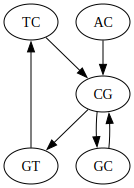

In [23]:
from graphviz import Source

st = "ACGCGTCG"
k = 3
dot = visualize_de_bruijn(st, k)  # this gives you the DOT-format string
Source(dot)

In [ ]:
st = "to_every_thing_turn_turn_turn_there_is_a_season"
G = DeBruijnGraph([st], 4)
path = G.eulerianWalk()
superstring = path[0] + ''.join(map(lambda x: x[-1], path[1:]))
print (superstring)
to_every_thing_turn_turn_turn_there_is_a_season

In [ ]:
st = "to_every_thing_turn_turn_turn_there_is_a_season"
G = DeBruijnGraph([st], 3)
path = G.eulerianWalk()
superstring = path[0] + ''.join(map(lambda x: x[-1], path[1:]))
print (superstring)
to_every_turn_turn_thing_turn_there_is_a_season